Import packages

In [1]:
# import the necessary packages
from matplotlib import pyplot as plt
import argparse
import random
import time
import cv2

Display function

In [2]:
def plt_imshow(title, image):
	# convert the image frame BGR to RGB color space and display it
	image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
	plt.imshow(image)
	plt.title(title)
	plt.grid(False)
	plt.show()

Pass inputs

In [12]:
# since we are using Jupyter Notebooks we can replace our argument
# parsing code with *hard coded* arguments and values
args = {
	"image": "input/drone.jpeg",
	"method": "fast"
}

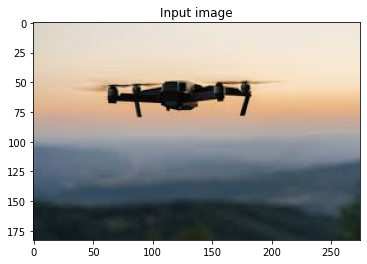

[INFO] using *fast* selective search


In [17]:
# load the input image
image = cv2.imread(args["image"])
plt_imshow("Input image", image)
# initialize OpenCV's selective search implementation and set the
# input image
ss = cv2.ximgproc.segmentation.createSelectiveSearchSegmentation()
ss.setBaseImage(image)

# check to see if we are using the *fast* but *less accurate* version
# of selective search
if args["method"] == "fast":
	print("[INFO] using *fast* selective search")
	ss.switchToSelectiveSearchFast()

# otherwise we are using the *slower* but *more accurate* version
else:
	print("[INFO] using *quality* selective search")
	ss.switchToSelectiveSearchQuality()

In [18]:
# run selective search on the input image
# start timer
start = time.time()
# output is list of bounding box rectanges
rects = ss.process()
# end timer
end = time.time()

# show how along selective search took to run along with the total
# number of returned region proposals
print("[INFO] selective search took {:.4f} seconds".format(end - start))
print("[INFO] {} total region proposals".format(len(rects)))

[INFO] selective search took 0.4487 seconds
[INFO] 327 total region proposals


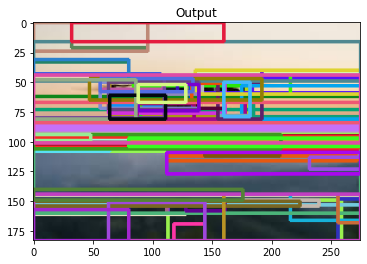

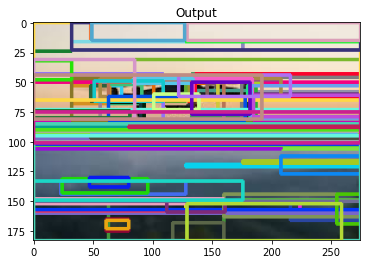

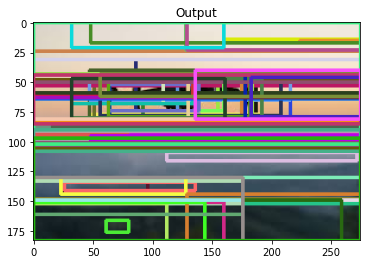

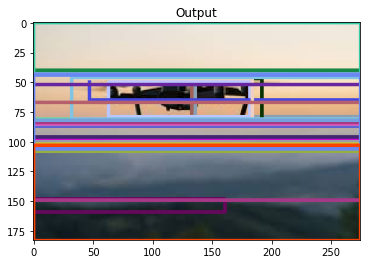

In [19]:
# loop over the region proposals in chunks (so we can better
# visualize them)
for i in range(0, len(rects), 100):
	# clone the original image so we can draw on it
	output = image.copy()

	# loop over the current subset of region proposals
	for (x, y, w, h) in rects[i:i + 100]:
		# draw the region proposal bounding box on the image
		color = [random.randint(0, 255) for j in range(0, 3)]
		cv2.rectangle(output, (x, y), (x + w, y + h), color, 2)

	# show the output image
	plt_imshow("Output", output)